# IAU Projekt

# Fáza 2 - predspracovanie údajov

V tejto fáze sa od Vás očakáva:
* Realizujte predspracovanie údajov pre strojové učenie. Výsledkom bude upravená dátová sada vo formáte csv alebo tsv, kde jedno pozorovanie musí byť opísané jedným riadkom.
* V 3. fáze budeme pracovať s algoritmami strojového učenia, ktorých implementácia v scikit-learn podporuje len numerické dáta. To vedie k tomu že treba niečo spraviť s nenumerickými dátami.
* Replikovateľnosť predspracovania na trénovacej a testovacej množine dát.

Keď sa predspracovaním mohol zmeniť tvar a charakteristiky dát (počet atribútov, distribúcie hodnôt a pod.), je možné že treba znovu zrealizovať podstatné časti prieskumnej analýzy a opakovane podľa Vašej potreby. Bodovanie znovu za EDA už nebudeme, zmeny ale zdokumentujte. Problém s dátami môžete riešiť iteratívne v každej fáze aj vo všetkých fázach podľa vlastnej potreby.


In [2]:
%run faza1.py

In [3]:
labor.head()

,index,weight,ssn,hemoglobin,alp,etytr,alt,erytrocyty,hbver,name,hematokrit,indicator,er-cv,leukocyty,smoker,relationship,ast,trombocyty
0,0,12.35740,803-27-3974,5.94182,86.80991,7.12559,2.18482,7.53345,7.51373,Kayla Rodriguez,6.98497,1.0,57.08422,7.21726,1,married,77.99546,7.98017
1,1,118.10209,205-46-9278,6.45407,79.22919,5.34025,1.60706,6.53048,7.30977,Diane Holt,8.65706,1.0,63.49068,9.35320,0,widowed,31.27623,9.27384
2,2,89.97897,507-12-0831,9.73090,17.97254,9.49744,1.75153,5.96430,8.02289,David Bryant MD,7.46431,1.0,66.64176,7.36311,0,nop,52.03928,8.18942
3,3,137.89307,328-79-8098,8.65753,19.63713,8.90814,5.80869,8.47758,7.37768,Joshua Hickman,9.15039,1.0,62.03448,6.50476,0,single,63.20161,6.22091
4,4,95.55653,307-37-5739,5.96644,82.63100,6.84092,3.16471,7.38053,8.07490,Frank Glover,9.55976,1.0,79.48715,9.45322,0,married,28.53852,7.38761


In [4]:
profiles.head()

,Unnamed: 0,race,residence,job,birthdate,company,blood_group,sex,ssn,name
0,0,White,"108 Pham Loaf\r\nNew Shelby, IN 31526",Magazine features editor,2007-09-11,"Reynolds, Stewart and Tanner",O+,F,087-49-2961,Laura Valentine
1,1,Asian,"2246 Tammy Cliffs Apt. 057\r\nNorth Kim, MI 55878","Investment banker, operational",1971-05-20,Mcdonald-White,A-,F,704-69-2733,Angela Sullivan
2,2,White,"12245 Maxwell Island\r\nNorth Benjamin, KY 38697",Charity fundraiser,1945-10-09,"Waters, Davis and Mcintyre",AB+,F,787-12-1516,Haley Ramirez
3,3,White,17000 Saunders Circles Apt. 457\r\nDonaldhaven...,"Engineer, production",2006-04-25,Watson and Sons,A+,F,127-86-0135,Mary Harris
4,4,Hawaiian,"43712 Andrea Expressway\r\nNorth Mckenzie, AZ ...",IT consultant,1936-03-01,Alvarez PLC,B+,M,875-46-1555,Jeremy James


In [5]:
merged.head()

,Unnamed: 0,race,birthdate,blood_group,sex,ssn,weight,hemoglobin,alp,etytr,...,erytrocyty,hbver,hematokrit,indicator,er-cv,leukocyty,smoker,relationship,ast,trombocyty
0,0,White,2007-09-11,O+,F,087-49-2961,68.64852,7.26815,68.18352,5.81889,...,6.93051,6.07205,11.27999,0.0,44.47642,8.86713,0,married,26.77151,5.62532
1,0,White,2007-09-11,O+,F,087-49-2961,39.27363,5.09400,58.42059,5.99564,...,6.54612,9.31958,11.65206,1.0,57.12059,10.57140,0,widowed,38.28069,6.59275
2,0,White,2007-09-11,O+,F,087-49-2961,61.21115,9.10298,14.51194,10.27253,...,6.91541,5.98328,9.13539,1.0,16.95110,7.30150,0,single,52.93857,8.58363
3,0,White,2007-09-11,O+,F,087-49-2961,121.34568,9.03854,11.04396,5.55113,...,6.49755,6.91512,8.46192,0.0,63.86999,8.47060,0,single,48.94005,7.28386
4,1,Asian,1971-05-20,A-,F,704-69-2733,107.36307,7.43673,68.85609,5.90077,...,7.88035,7.00488,5.96198,1.0,42.66862,6.25355,0,nop,60.53571,9.03697


## 1. Integrácia a čistenie dát (5b)

Transformujte dáta na vhodný formát pre strojové učenie t.j. jedno pozorovanie musí byť opísané jedným riadkom a každý atribút musí byť v numerickom formáte. 
* Pri riešení chýbajúcich hodnôt (missing values) vyskúšajte rôzne stratégie z nasledujúcich podskupín:
    * odstránenie pozorovaní s chýbajúcimi údajmi
    * nahradenie chýbajúcej hodnoty mediánom, priemerom, pomerom (ku korelovanému atribútu), alebo pomocou lineárnej regresie resp. kNN
* Podobne postupujte aj pri riešení vychýlených hodnôt (outlier detection):
    * odstránenie vychýlených (odľahlých) pozorovaní
    * nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (5% resp. 95%)

1. race

In [6]:
import category_encoders as ce
ce_ordinal = ce.OrdinalEncoder(cols=['race'])
profiles = ce_ordinal.fit_transform(profiles)

2. residence

Tento atribút je až príliš a nepotrebne detailný pre spracovanie dát, preto transformujeme využitím generalizácie bydlisko na štát. Aby sme z celého textu bydliska získali štát, je potrebné NLP a to pomocou regex výrazov. Na obídenie nesprávnych výsledkov využijeme fakt, že názov štátu je zapísaný ako skratka s PSČ.

Počet výsledkov je zhodný s počtom záznamov v datasete a po manuálnej kontrole všetky výsledky patria nejakej krajine s PSČ.

In [7]:
import re
import category_encoders as ce

for i in profiles['residence'].index:
    country_code = re.findall('[A-Z]{2} [0-9]{5}', str(profiles['residence'][i]))[0]
    profiles.at[i, 'state']=re.findall('[A-Z]{2}', country_code)[0]
len(profiles['state'].value_counts())


54

Počet unikátnych krajín je správny, keď vychádzame z pravidiel v USA. 54 štátov dokopy predstavuje 51 štátov v USA plus 3 "military states" (AA, AE, AP).

<AxesSubplot:>

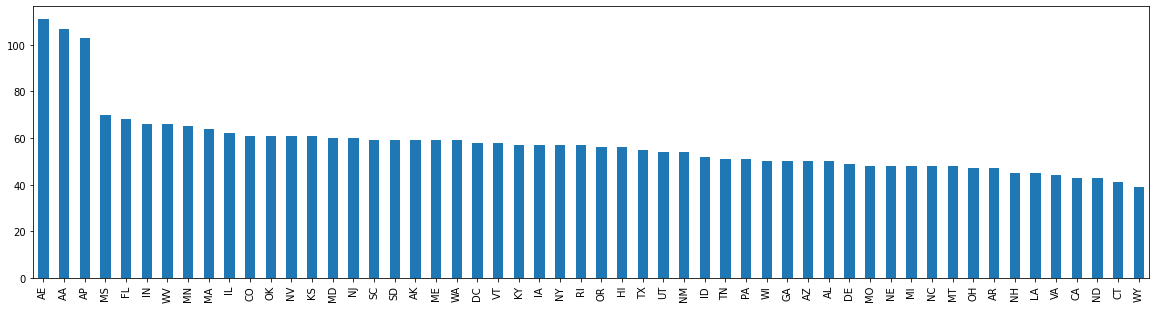

In [8]:
profiles['state'].value_counts().plot(kind='bar', figsize=(20, 5))

In [9]:
ce_ordinal = ce.OrdinalEncoder(cols=['state'])
profiles = ce_ordinal.fit_transform(profiles)

3. blood_group

In [10]:
ce_ordinal = ce.OrdinalEncoder(cols=['blood_group'])
profiles = ce_ordinal.fit_transform(profiles)

4. sex

In [11]:
ce_OHE = ce.OneHotEncoder(cols=['sex'], use_cat_names=True)
profiles = ce_OHE.fit_transform(profiles)

In [12]:
import datetime
def frombirthtoage(born):
    now = datetime.date.today()
    return now.year - born.year - ((now.month, now.day) < (born.month, born.day))
ages = profiles['birthdate'].apply(lambda d: frombirthtoage(d))
profiles = profiles.assign(age=ages.values)

<AxesSubplot:>

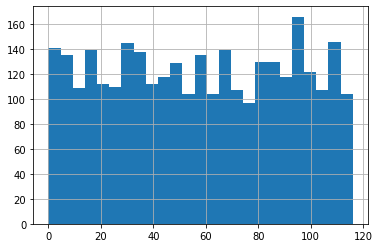

In [25]:
profiles.age.hist(bins=25)

In [13]:
profiles.head()

,Unnamed: 0,race,residence,job,birthdate,company,blood_group,sex_F,sex_M,ssn,name,state,age
0,0,1,"108 Pham Loaf\r\nNew Shelby, IN 31526",Magazine features editor,2007-09-11,"Reynolds, Stewart and Tanner",1,1,0,087-49-2961,Laura Valentine,1,14
1,1,2,"2246 Tammy Cliffs Apt. 057\r\nNorth Kim, MI 55878","Investment banker, operational",1971-05-20,Mcdonald-White,2,1,0,704-69-2733,Angela Sullivan,2,50
2,2,1,"12245 Maxwell Island\r\nNorth Benjamin, KY 38697",Charity fundraiser,1945-10-09,"Waters, Davis and Mcintyre",3,1,0,787-12-1516,Haley Ramirez,3,76
3,3,1,17000 Saunders Circles Apt. 457\r\nDonaldhaven...,"Engineer, production",2006-04-25,Watson and Sons,4,1,0,127-86-0135,Mary Harris,4,15
4,4,3,"43712 Andrea Expressway\r\nNorth Mckenzie, AZ ...",IT consultant,1936-03-01,Alvarez PLC,5,0,1,875-46-1555,Jeremy James,5,85


## 2. Realizácia predspracovania dát (5b)


* Transformované dáta pre strojové učenie si rozdeľuje na trénovaciu a testovaciu množinu (train and test dataset) podľa vami preddefinovaným pomerom. Naďalej pracujte len s trénovacím datasetom.
* Transformujte atribútov dát pre strojové učenie podľa dostupných techník (minimálne 2 techniky) ako scaling, transformers a ďalšie.
* Zdôvodnite Vašu voľby/rozhodnutie pre realizáciu (t.j. zdokumentovanie)

In [14]:
labor.head()

,index,weight,ssn,hemoglobin,alp,etytr,alt,erytrocyty,hbver,name,hematokrit,indicator,er-cv,leukocyty,smoker,relationship,ast,trombocyty
0,0,12.35740,803-27-3974,5.94182,86.80991,7.12559,2.18482,7.53345,7.51373,Kayla Rodriguez,6.98497,1.0,57.08422,7.21726,1,married,77.99546,7.98017
1,1,118.10209,205-46-9278,6.45407,79.22919,5.34025,1.60706,6.53048,7.30977,Diane Holt,8.65706,1.0,63.49068,9.35320,0,widowed,31.27623,9.27384
2,2,89.97897,507-12-0831,9.73090,17.97254,9.49744,1.75153,5.96430,8.02289,David Bryant MD,7.46431,1.0,66.64176,7.36311,0,nop,52.03928,8.18942
3,3,137.89307,328-79-8098,8.65753,19.63713,8.90814,5.80869,8.47758,7.37768,Joshua Hickman,9.15039,1.0,62.03448,6.50476,0,single,63.20161,6.22091
4,4,95.55653,307-37-5739,5.96644,82.63100,6.84092,3.16471,7.38053,8.07490,Frank Glover,9.55976,1.0,79.48715,9.45322,0,married,28.53852,7.38761


**Rozdelenie na trénovaciu a testovaciu množinu**

Dataset labor rozdelíme v pomere 33% pre testovaciu množinu a 66% pre trénovaciu množinu.

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(labor, test_size=0.33)


**alt** 

(array([  2.,   2.,   3.,   5.,  11.,  20.,  37.,  65., 132., 215., 370.,
        597., 716., 799., 827., 699., 617., 516., 360., 312., 190., 103.,
         54.,  23.,   4.]),
 array([-4.39046371, -4.0891695 , -3.78787529, -3.48658109, -3.18528688,
        -2.88399268, -2.58269847, -2.28140427, -1.98011006, -1.67881585,
        -1.37752165, -1.07622744, -0.77493324, -0.47363903, -0.17234482,
         0.12894938,  0.43024359,  0.73153779,  1.032832  ,  1.3341262 ,
         1.63542041,  1.93671462,  2.23800882,  2.53930303,  2.84059723,
         3.14189144]),
 <BarContainer object of 25 artists>)

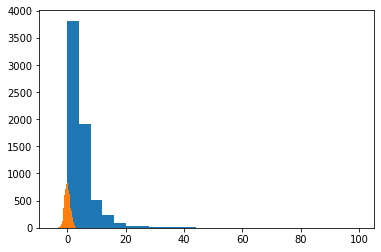

In [16]:
from matplotlib import pyplot
from sklearn.preprocessing import PowerTransformer

pyplot.hist(train['alt'], bins=25)
power = PowerTransformer(method='yeo-johnson', standardize=True) 
alt_trans = power.fit_transform(train[['alt']])
pyplot.hist(alt_trans, bins=25)
# train[['alt']] = alt_trans


Hodnoty atribútu alt neboli veľmi rovnomerne rozdelené, preto sme využili Power Transformer.

array([[<AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'hemoglobin_s'}>,
        <AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'alp_s'}>,
        <AxesSubplot:title={'center':'etytr'}>],
       [<AxesSubplot:title={'center':'etytr_s'}>,
        <AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'alt_s'}>,
        <AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'erytrocyty_s'}>],
       [<AxesSubplot:title={'center':'hbver'}>,
        <AxesSubplot:title={'center':'hbver_s'}>,
        <AxesSubplot:title={'center':'hematokrit'}>,
        <AxesSubplot:title={'center':'hematokrit_s'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'er-cv_s'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'leukocyty_s'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'a

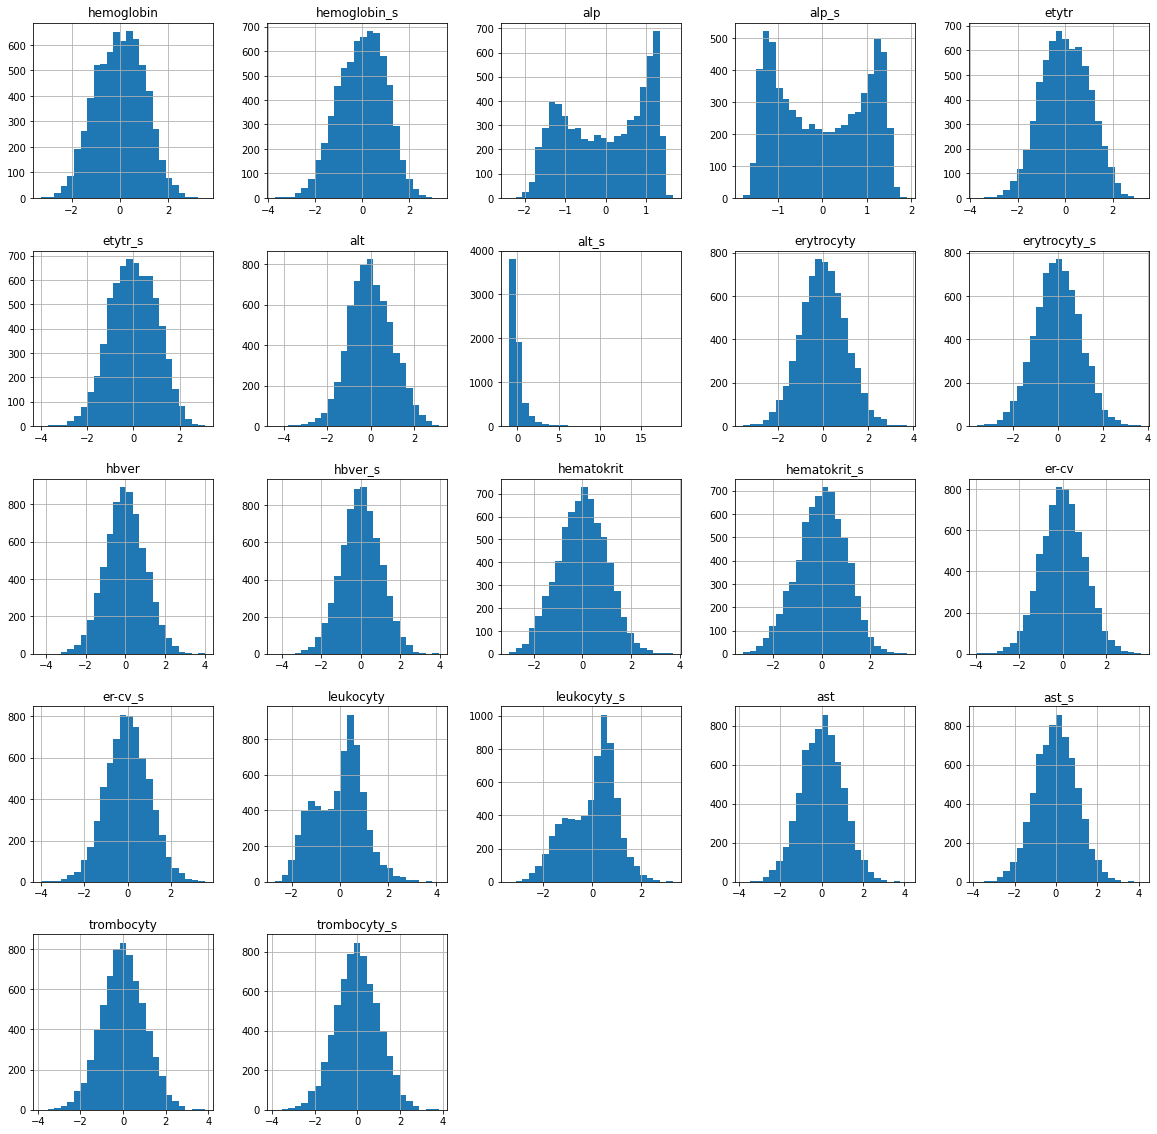

In [17]:
from sklearn.preprocessing import  StandardScaler, QuantileTransformer
from pandas import DataFrame

power = PowerTransformer(method='yeo-johnson', standardize=True) 
sscaler = StandardScaler()

trans = DataFrame()
for column in ['hemoglobin', 'alp', 'etytr', 'alt', 'erytrocyty', 'hbver', 'hematokrit', 'er-cv', 'leukocyty', 'ast', 'trombocyty']:
    # train['alp'].fillna(0, inplace=True)
    powered = power.fit_transform(train[[column]])
    trans[column] = DataFrame(powered)
    trans[f'{column}_s'] = DataFrame(sscaler.fit_transform(train[[column]]) )
    # pyplot.hist(powered, bins=25)
    # sscaled = sscaler.fit_transform(train[[column]]) 
    # pyplot.hist(sscaled, bins=25)

trans.hist(bins=25, figsize=(20,20))


(array([ 24., 281., 500., 277., 266., 281., 266., 251., 278., 276., 246.,
        280., 252., 259., 256., 264., 275., 235., 286., 263., 266., 280.,
        584., 222.,  12.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

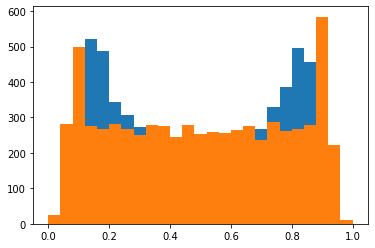

In [18]:
from sklearn.preprocessing import  QuantileTransformer, MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(train[['alp']]) 
pyplot.hist(scaled, bins=25)
scalera = QuantileTransformer(n_quantiles=10, random_state=0)
scaleda = scalera.fit_transform(train[['alp']]) 
pyplot.hist(scaleda, bins=25)

In [19]:
ce_ordinal = ce.OrdinalEncoder(cols=['relationship'])
labor = ce_ordinal.fit_transform(labor)

dátum narodenia -> vek -> data bucketing (vid 6.21)

job ~NLP

company??

In [20]:
profiles.loc[profiles['ssn'] == '830-16-7156']

,Unnamed: 0,race,residence,job,birthdate,company,blood_group,sex_F,sex_M,ssn,name,state,age
2008,2008,1,Unit 8939 Box 0391\r\nDPO AA 32291,Art gallery manager,1983-01-20,"Mayo, Brown and Schmitt",7,1,0,830-16-7156,Lauren Long,25,38


## 3. Výber atribútov pre strojové učenie (5b)

* Zistite ktoré atribúty (features) vo vašich dátach pre strojové učenie sú informatívne k atribútu “indikator”. Zoradíte tie atribúty v poradí podľa dôležitosti. 
* Zdôvodnite Vašu voľby/rozhodnutie pre realizáciu (t.j. zdokumentovanie)

## 4. Replikovateľnosť predspracovania (5b)

* Upravte váš kód realizujúci predspracovanie trénovacej množiny tak, aby ho bolo možné bez ďalších úprav znovu použiť na predspracovanie testovacej množiny (napr. pomocou funkcie/í)
* Očakáva sa aj využitie možnosti sklearn.pipeline

Správa sa odovzdáva v 9. týždni semestra

Na cvičení, dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v Jupyter Notebooku.
Správu elektronicky odovzdá jeden člen z dvojice do systému AIS do nedele 21.11.2021 23:59.